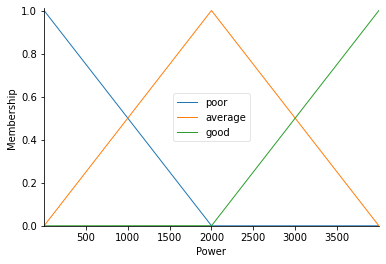

In [14]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import pandas as pd




wind_speed=ctrl.Antecedent(np.arange(1,20),'wind_speed')
wind_speed['poor']=fuzzy.trimf(wind_speed.universe,[0,0,5])
wind_speed['average']=fuzzy.trimf(wind_speed.universe,[0,5,15])
wind_speed['good']=fuzzy.trimf(wind_speed.universe,[0,15,20])

# wind_direction

Power=ctrl.Consequent(np.arange(1,4000,1),'Power')
Power.automf(3)
Power.view()
plt.show()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc6e343a3c8>)

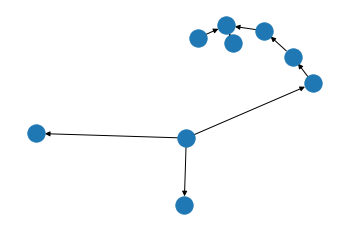

In [7]:
rule1 = ctrl.Rule(wind_speed['poor'] , Power['poor'])
rule2 = ctrl.Rule(wind_speed['average'], Power['average'])
rule3 = ctrl.Rule(wind_speed['good'], Power['good'])

rule1.view()

2418.4139521143943


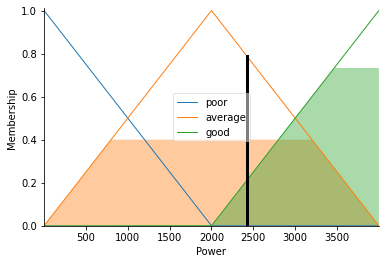

In [8]:
power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
power = ctrl.ControlSystemSimulation(power_ctrl)

power.input['wind_speed'] = 11
power.compute()

print (power.output['Power'])
Power.view(sim=power)